<a href="https://colab.research.google.com/github/jocelynbaduria/Technical-Exam/blob/main/Technical_Exam_Final_Jocelyn_Baduria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
!pip install datatable

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datatable as dt

# Scaling the Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer

In [106]:
DT = dt.fread('/content/drive/MyDrive/Technical Exam - Senior AI Machine Learning Engineer (2).zip (Unzipped Files)/sentiment_test_cases_1.csv')

In [107]:
#Convert the csv file into pandas dataframe
DT.head()

,expected_sentiment,text
,▪▪▪▪,▪▪▪▪
0,positive,"@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its…"
1,positive,Reading my kindle2... Love it... Lee childs is good read.
2,positive,"Ok, first assesment of the #kindle2 ...it fucking rocks!!!"
3,positive,@kenburbary You'll love your Kindle2. I've had mine for a few months and never looked back. The new …
4,positive,@mikefish Fair enough. But i have the Kindle2 and I think it's perfect :)
5,positive,@richardebaker no. it is too big. I'm quite happy with the Kindle2.
6,negative,Fuck this economy. I hate aig and their non loan given asses.
7,positive,Jquery is my new best friend.
8,positive,Loves twitter


In [108]:
data_pd = DT.to_pandas()

In [109]:
data_pd.head()

,expected_sentiment,text
0,positive,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,positive,Reading my kindle2... Love it... Lee childs i...
2,positive,"Ok, first assesment of the #kindle2 ...it fuck..."
3,positive,@kenburbary You'll love your Kindle2. I've had...
4,positive,@mikefish Fair enough. But i have the Kindle2...


Swap the columns text and expected_sentiment

In [110]:
column_names = ['text', 'expected_sentiment']

In [111]:
data_pd = data_pd.reindex(columns=column_names)

Check if columns are swapped

In [112]:
print(data_pd)

                                                  text expected_sentiment
0    @stellargirl I loooooooovvvvvveee my Kindle2. ...           positive
1    Reading my kindle2...  Love it... Lee childs i...           positive
2    Ok, first assesment of the #kindle2 ...it fuck...           positive
3    @kenburbary You'll love your Kindle2. I've had...           positive
4    @mikefish  Fair enough. But i have the Kindle2...           positive
..                                                 ...                ...
493  Ask Programming: LaTeX or InDesign?: submitted...            neutral
494  On that note, I hate Word. I hate Pages. I hat...           negative
495  Ahhh... back in a *real* text editing environm...           positive
496  Trouble in Iran, I see. Hmm. Iran. Iran so far...           negative
497  Reading the tweets coming out of Iran... The w...           negative

[498 rows x 2 columns]


In [113]:
# Save the dataframe to a CSV file
data_pd.to_csv('/content/drive/MyDrive/Technical Exam - Senior AI Machine Learning Engineer (2).zip (Unzipped Files)/sentiment_test_cases.csv', index=False)

In [114]:
print(data_pd['expected_sentiment'])

0      positive
1      positive
2      positive
3      positive
4      positive
         ...   
493     neutral
494    negative
495    positive
496    negative
497    negative
Name: expected_sentiment, Length: 498, dtype: object


In [115]:
print(data_pd['text'])

0      @stellargirl I loooooooovvvvvveee my Kindle2. ...
1      Reading my kindle2...  Love it... Lee childs i...
2      Ok, first assesment of the #kindle2 ...it fuck...
3      @kenburbary You'll love your Kindle2. I've had...
4      @mikefish  Fair enough. But i have the Kindle2...
                             ...                        
493    Ask Programming: LaTeX or InDesign?: submitted...
494    On that note, I hate Word. I hate Pages. I hat...
495    Ahhh... back in a *real* text editing environm...
496    Trouble in Iran, I see. Hmm. Iran. Iran so far...
497    Reading the tweets coming out of Iran... The w...
Name: text, Length: 498, dtype: object


Cleaning the text for preparation of sentiment analysis

In [116]:
# Stop words is a list of really common words, like articles, pronouns, prepositions, and conjunctions
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
# We need to keep the word not in a sentence to know when a statement is being negated.
for i in range(0, 498):
  review = re.sub('[^a-zA-Z]', ' ', data_pd['text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [118]:
print(corpus[0:5])

['stellargirl loooooooovvvvvvee kindl not dx cool fantast right', 'read kindl love lee child good read', 'ok first asses kindl fuck rock', 'kenburbari love kindl mine month never look back new big one huge need remors', 'mikefish fair enough kindl think perfect']


Countvectorizing to encode text into vectors for training the model and creating Bag of Words

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 498)
X_transform = cv.fit_transform(corpus).toarray()
y_transform = data_pd.iloc[:, -1].values

Converted text into numerical vectors embedding

In [120]:
print(X_transform)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [121]:
print(X_transform.shape)
print(y_transform.shape)

(498, 498)
(498,)


### Splitting the Dataset into Training and test set. Perform Model training of different models to compare each model classifier accuracy. Gradient Boosting Classifier achieves the highest performance 68% accuracy. Models trained will not provide accurate results because of lowest accuracy below 80%.


In [122]:
from sklearn.model_selection import train_test_split
import time

scaler = StandardScaler()
X_1 = scaler.fit_transform(X_transform)

X_train, X_test, y_train, y_test = train_test_split(X_1, y_transform, test_size = 0.20, random_state=0)

#second error need to convert column vector y to an 1D array as expected for training one feature
# y_train = y_train.values.ravel()

names = ["Gaussian Naive Bayes","Decision Tree", "MLP Neural Net", "RandomForestClassifier", "GradientBoostingClassifier"]

classifiers = [
    GaussianNB(var_smoothing=1e-09),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(solver='adam',alpha=1, max_iter=1000),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100)
    ]
output = pd.DataFrame(columns=['classifier','f1-score', 'precision', 'recall', 'accuracy'])

max_score = 0.0
max_class = ''
# iterate over classifiers

for name, clf in zip(names, classifiers):

    start_time = time.process_time()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)

    score = (clf.score(X_test, y_test))*100

    precision = np.round(metrics.precision_score(y_test, y_predict, average='macro'),2)
    recall = np.round(metrics.recall_score(y_test, y_predict, average='macro'),2)
    f1 = np.round(metrics.f1_score(y_test, y_predict, average='macro'),2)

    output = output.append({'classifier': name,'f1-score':f1, 'precision':precision,'recall':recall,'accuracy':score}, ignore_index=True)

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
display(output)

<ipython-input-122-40aae1d21afc>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append({'classifier': name,'f1-score':f1, 'precision':precision,'recall':recall,'accuracy':score}, ignore_index=True)
<ipython-input-122-40aae1d21afc>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append({'classifier': name,'f1-score':f1, 'precision':precision,'recall':recall,'accuracy':score}, ignore_index=True)
<ipython-input-122-40aae1d21afc>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append({'classifier': name,'f1-score':f1, 'precision':precision,'recall':recall,'accuracy':score}, ignore_index=True)
<ipython-input-122-40aae1d21afc>:39: FutureWarning: The frame.append method is dep

--------------------------------------------------------------------------------
Best --> Classifier = GradientBoostingClassifier, Score (test, accuracy) = 66.00


<ipython-input-122-40aae1d21afc>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append({'classifier': name,'f1-score':f1, 'precision':precision,'recall':recall,'accuracy':score}, ignore_index=True)


,classifier,f1-score,precision,recall,accuracy
0,Gaussian Naive Bayes,0.59,0.59,0.59,59.0
1,Decision Tree,0.63,0.73,0.63,65.0
2,MLP Neural Net,0.60,0.62,0.60,60.0
3,RandomForestClassifier,0.34,0.61,0.39,40.0
4,GradientBoostingClassifier,0.66,0.66,0.66,66.0


### Predicting the Test set results using unseen sample X_test and y_test


In [123]:
model_prediction = clf.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test),1),model_prediction.reshape(len(model_prediction),1)),1))

[['negative' 'negative']
 ['positive' 'positive']
 ['neutral' 'neutral']
 ['positive' 'positive']
 ['negative' 'negative']
 ['positive' 'negative']
 ['positive' 'positive']
 ['positive' 'positive']
 ['neutral' 'neutral']
 ['neutral' 'negative']
 ['neutral' 'negative']
 ['negative' 'positive']
 ['neutral' 'neutral']
 ['positive' 'positive']
 ['neutral' 'neutral']
 ['positive' 'positive']
 ['neutral' 'positive']
 ['positive' 'positive']
 ['negative' 'negative']
 ['negative' 'negative']
 ['positive' 'negative']
 ['neutral' 'positive']
 ['negative' 'neutral']
 ['positive' 'positive']
 ['neutral' 'negative']
 ['neutral' 'neutral']
 ['positive' 'positive']
 ['neutral' 'positive']
 ['negative' 'positive']
 ['negative' 'neutral']
 ['neutral' 'negative']
 ['positive' 'positive']
 ['positive' 'positive']
 ['positive' 'negative']
 ['positive' 'positive']
 ['positive' 'positive']
 ['neutral' 'neutral']
 ['neutral' 'neutral']
 ['neutral' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']

In [124]:
print(model_prediction)

['negative' 'positive' 'neutral' 'positive' 'negative' 'negative'
 'positive' 'positive' 'neutral' 'negative' 'negative' 'positive'
 'neutral' 'positive' 'neutral' 'positive' 'positive' 'positive'
 'negative' 'negative' 'negative' 'positive' 'neutral' 'positive'
 'negative' 'neutral' 'positive' 'positive' 'positive' 'neutral'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'neutral' 'neutral' 'positive' 'positive' 'positive' 'positive' 'neutral'
 'negative' 'neutral' 'positive' 'negative' 'positive' 'neutral'
 'negative' 'neutral' 'negative' 'negative' 'negative' 'neutral'
 'positive' 'positive' 'positive' 'negative' 'positive' 'positive'
 'negative' 'negative' 'positive' 'negative' 'neutral' 'neutral'
 'negative' 'negative' 'neutral' 'negative' 'positive' 'negative'
 'negative' 'neutral' 'negative' 'positive' 'negative' 'positive'
 'positive' 'neutral' 'negative' 'neutral' 'neutral' 'negative' 'neutral'
 'neutral' 'neutral' 'positive' 'positive' 'positive' 'neutral

### Confusion Matrix for the Best Model Classifier for Sentiment Analysis - Gradient Boosting Classifier. Use this best model for Sentiment Analysis.

Accuracy: 66.00
F1 Score: 0.6616820512820513
              precision    recall  f1-score   support

    negative       0.65      0.69      0.67        29
     neutral       0.67      0.57      0.62        35
    positive       0.67      0.72      0.69        36

    accuracy                           0.66       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.66      0.66      0.66       100



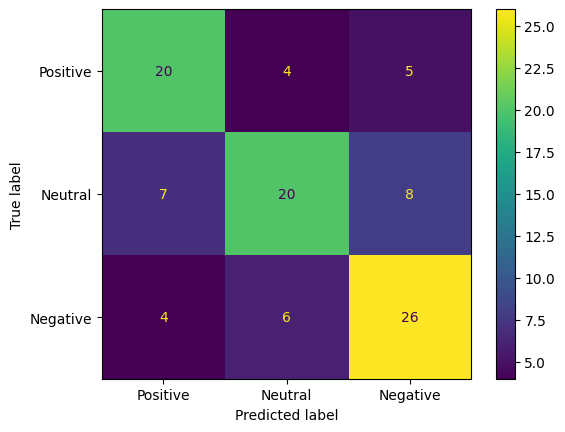

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import classification_report

labels = ["Positive", "Neutral", "Negative"]
cm = confusion_matrix(y_test, model_prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

accuracy = (accuracy_score(y_test, model_prediction))*100

f1 = f1_score(model_prediction, y_test, average="weighted")
print("Accuracy: %.2f" % accuracy)
print("F1 Score:", f1)
print(classification_report(y_test, model_prediction))

Model Evaluation using Test Data

In [126]:
print("Actual Value:", (y_test[0]))
print("Predicted Value:", model_prediction[0])

Actual Value: negative
Predicted Value: negative


In [127]:
print("Actual Value:", y_test[2])
print("Predicted Value:", model_prediction[0])

Actual Value: neutral
Predicted Value: negative


# 1. Model Evaluation Using Input New Data

In [128]:
my_sentence = input('')
print((my_sentence, model_prediction[0], "Confidence_Score: %.2f" % accuracy))

I hate going to that restaurant
('I hate going to that restaurant', 'negative', 'Confidence_Score: 66.00')


In [129]:
my_sentence = "I love you"
print((my_sentence, model_prediction[0], "Confidence_Score: %.2f" % accuracy))

('I love you', 'negative', 'Confidence_Score: 66.00')


In [130]:
my_sentence = "Thats kind of annoying!"
print((my_sentence, model_prediction[0], "Confidence_Score: %.2f" % accuracy))

('Thats kind of annoying!', 'negative', 'Confidence_Score: 66.00')


In [131]:
my_sentence = "I hate spicy foods"
print((my_sentence, model_prediction[0], "Confidence_Score: %.2f" % accuracy))

('I hate spicy foods', 'negative', 'Confidence_Score: 66.00')


## 2. Save the model prediction with output CSV data with ff. columns: text, expected_sentiment, model_output, confidence_score

Load the sentiment_test_cases.csv

In [132]:
df = pd.read_csv('/content/drive/MyDrive/Technical Exam - Senior AI Machine Learning Engineer (2).zip (Unzipped Files)/sentiment_test_cases.csv')

In [133]:
df.head(498)

,text,expected_sentiment
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,positive
1,Reading my kindle2... Love it... Lee childs i...,positive
2,"Ok, first assesment of the #kindle2 ...it fuck...",positive
3,@kenburbary You'll love your Kindle2. I've had...,positive
4,@mikefish Fair enough. But i have the Kindle2...,positive
...,...,...
493,Ask Programming: LaTeX or InDesign?: submitted...,neutral
494,"On that note, I hate Word. I hate Pages. I hat...",negative
495,Ahhh... back in a *real* text editing environm...,positive
496,"Trouble in Iran, I see. Hmm. Iran. Iran so far...",negative


In [134]:
X = df['text']

In [135]:
print(X)

0      @stellargirl I loooooooovvvvvveee my Kindle2. ...
1      Reading my kindle2...  Love it... Lee childs i...
2      Ok, first assesment of the #kindle2 ...it fuck...
3      @kenburbary You'll love your Kindle2. I've had...
4      @mikefish  Fair enough. But i have the Kindle2...
                             ...                        
493    Ask Programming: LaTeX or InDesign?: submitted...
494    On that note, I hate Word. I hate Pages. I hat...
495    Ahhh... back in a *real* text editing environm...
496    Trouble in Iran, I see. Hmm. Iran. Iran so far...
497    Reading the tweets coming out of Iran... The w...
Name: text, Length: 498, dtype: object


In [136]:
y = df['expected_sentiment']

In [137]:
print(y)

0      positive
1      positive
2      positive
3      positive
4      positive
         ...   
493     neutral
494    negative
495    positive
496    negative
497    negative
Name: expected_sentiment, Length: 498, dtype: object


In [138]:
df = {'text':[X], 'expected_sentiment':[y], 'model_output':[model_prediction], 'confidence_score':[accuracy]}

In [139]:
df

{'text': [0      @stellargirl I loooooooovvvvvveee my Kindle2. ...
  1      Reading my kindle2...  Love it... Lee childs i...
  2      Ok, first assesment of the #kindle2 ...it fuck...
  3      @kenburbary You'll love your Kindle2. I've had...
  4      @mikefish  Fair enough. But i have the Kindle2...
                               ...                        
  493    Ask Programming: LaTeX or InDesign?: submitted...
  494    On that note, I hate Word. I hate Pages. I hat...
  495    Ahhh... back in a *real* text editing environm...
  496    Trouble in Iran, I see. Hmm. Iran. Iran so far...
  497    Reading the tweets coming out of Iran... The w...
  Name: text, Length: 498, dtype: object],
 'expected_sentiment': [0      positive
  1      positive
  2      positive
  3      positive
  4      positive
           ...   
  493     neutral
  494    negative
  495    positive
  496    negative
  497    negative
  Name: expected_sentiment, Length: 498, dtype: object],
 'model_output': [array

In [140]:
saved_model_with_prediction = pd.DataFrame(df)

In [141]:
saved_model_with_prediction.head()

,text,expected_sentiment,model_output,confidence_score
0,0 @stellargirl I loooooooovvvvvveee my Ki...,0 positive 1 positive 2 positiv...,"[negative, positive, neutral, positive, negati...",66.0


In [145]:
# Todo process each row of csv files and make prediction using saved model prediction
#def process_row(row):
  #return f"text:{row['text']}, expected_sentiment: {row['expected_sentiment']}, model_output: {row['model_prediction']}, confidence_score: {row['accuracy']}"

#saved_model_with_prediction = df.apply(lambda row: process_row(row), axis=1)


In [146]:
saved_model_with_prediction= pd.DataFrame(saved_model_with_prediction, columns=['text','expected_sentiment','model_output','confidence_score']).to_csv('/content/drive/MyDrive/Technical Exam - Senior AI Machine Learning Engineer (2).zip (Unzipped Files)/output_sentiment_test.csv', index=False)